# Bibliothèques


In [13]:
import numpy as np
import pandas as pd

In [14]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/LucaSainteCroix/teaching-resources/main/exercises-data/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/LucaSainteCroix/teaching-resources/main/exercises-data/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [15]:
# Your code here :

df_main['DATE'] = df_main['DATE'].str.lower()
df_opinion['date'] = df_opinion['date'].str.lower()

df2018 = pd.merge(df_main, df_opinion, how='outer', left_on='DATE', right_on='date')

df2018 = df2018.drop(columns=['date'])
df2018


DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0    2018-01-01                 12                  8                 61   
1    2018-01-02                 13                  6                 26   
2    2018-01-03                 15                 10                 40   
3    2018-01-04                 14                 11                 45   
4    2018-01-05                 12                  7                 21   
..          ...                ...                ...                ...   
360  2018-12-27                  7                  2                  6   
361  2018-12-28                  7                  2                  8   
362  2018-12-29                  7                  1                  6   
363  2018-12-30                  9                  4                  6   
364  2018-12-31                  9                  5                 10   

     TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                        9                  11                      8   
1                        8                  12                     13   
2                       11                  12                     10   
3                       14                  14                     11   
4                       10                  11                      8   
..                     ...                 ...                    ...   
360                      2                   6                      5   
361                      2                   7                      3   
362                      1                   6                      4   
363                      5                   9                      8   
364                      5                   9                      6   

     PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                    8.9                    79              9.500   
1                    0.6                    96              9.000   
2                    5.5                    82              8.500   
3                    0.0                    89             10.000   
4                    1.5                    85              9.875   
..                   ...                   ...                ...   
360                  0.0                    85             10.000   
361                  0.0                    89              8.000   
362                  0.0                    94              7.000   
363                  0.1                    95              6.000   
364                  0.0                    95              6.000   

     PRESSURE_MAX_MB  CLOUDCOVER_AVG_PERCENT  HEATINDEX_MAX_C  DEWPOINT_MAX_C  \
0               1018                  41.750               12               8   
1               1020                  87.875               13              12   
2               1017                  91.500               15              13   
3               1011                  90.125               14              12   
4               1005                  62.375               12              10   
..               ...                     ...              ...             ...   
360             1027                  30.750                8               6   
361             1035                  18.750                8               4   
362             1038                  33.000                8               5   
363             1038                  70.375               10               9   
364             1038                  40.250               10               7   

     WINDTEMP_MAX_C  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR  \
0                 7                 113.0            0.0       3.0      5.1   
1                 6                 122.0            0.0       3.0      3.3   
2                 7                 122.0            0.0       3.0      3.3   
3                10                 116.0            0.0       3.0      3.3   
4                 7     

# Linear regression
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [16]:
# Your code here :

# Splitting the DataFrame into df_clean and df_nan
df_clean = df2018.dropna(subset=['SUNHOUR'])
df_nan = df2018[df2018['SUNHOUR'].isna()]

print("Shape of df_clean:", df_clean.shape)
print("Shape of df_nan:", df_nan.shape)


Shape of df_clean: (341, 20)
Shape of df_nan: (24, 20)


## Now, train your model
For this part, let's work on df_clean.
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!).

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [17]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Drop non-numeric columns
X_clean = df_clean.drop(columns=['SUNHOUR', 'DATE', 'OPINION'])
y_clean = df_clean['SUNHOUR']

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

model_clean = LinearRegression()

# Train the model on the training set
model_clean.fit(X_train_clean, y_train_clean)

y_pred_clean = model_clean.predict(X_test_clean)

# Calculate the R2-score for the test set
r2_clean = r2_score(y_test_clean, y_pred_clean)

print("\nR2-score for the test set (after dropping non-numeric columns):", r2_clean)




R2-score for the test set (after dropping non-numeric columns): 0.6993218810508249


## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [52]:
# Your code here

X_missing = df_nan.loc[:, X_train.columns]
X_missing

df_nan['SUNHOUR'] = model_train.predict(X_train)


         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

c:\Users\benoi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Found unknown categories [1, 4, 6, 10, 16, 23, 26, 31, 34, 40, 43, 46, 47, 56, 57, 58, 64, 73, 74, 77, 78, 79, 83, 91, 94, 95, 102, 109, 110, 115, 120, 125, 127, 138, 153, 166, 177, 184, 193, 194, 196, 197, 204, 221, 225, 234, 235, 238, 243, 249, 254, 263, 266, 276, 284, 293, 298, 301, 305, 310, 326, 330, 332, 338, 339, 343, 346, 347, 348, 350, 353, 360, 362] in column 0 during transform

## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values.

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

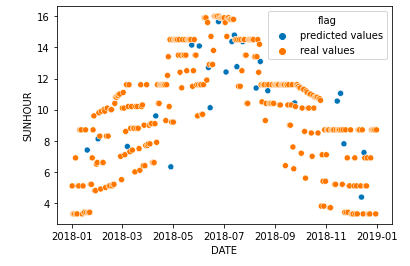

TypeError: unhashable type: 'numpy.ndarray'

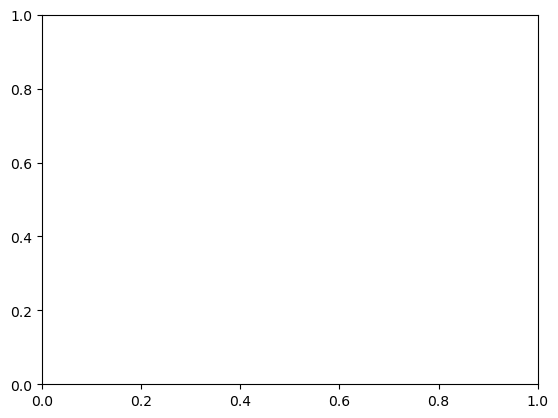

In [53]:
# Your code here
import matplotlib.pyplot as plt

df2018complete = pd.concat([df_nan, df_nan], axis=1)

# plt.figure(figsize=(12, 6))
plt.scatter(df2018complete['DATE'], df2018complete['SUNHOUR'], label='Real Values', alpha=0.7, color='orange')
plt.scatter(df2018complete['DATE'], df2018complete['SUNHOUR_PREDICTION'], label='Prediction Values', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Sunhours')
plt.title('Real vs Predicted Sunhours')
plt.legend()
plt.show()